In [1]:
import pandas as pd
df = pd.read_csv('.\sample3.csv')
df

,Unnamed: 0,City,Variety,Month,Package,Low Price,High Price,Price
0,70,BALTIMORE,PIE TYPE,9,1 1/9 bushel cartons,15.00,15.0,13.50
1,71,BALTIMORE,PIE TYPE,9,1 1/9 bushel cartons,18.00,18.0,16.20
2,72,BALTIMORE,PIE TYPE,10,1 1/9 bushel cartons,18.00,18.0,16.20
3,73,BALTIMORE,PIE TYPE,10,1 1/9 bushel cartons,17.00,17.0,15.30
4,74,BALTIMORE,PIE TYPE,10,1 1/9 bushel cartons,15.00,15.0,13.50
...,...,...,...,...,...,...,...,...
410,1738,ST. LOUIS,MINIATURE,9,1/2 bushel cartons,15.00,15.0,30.00
411,1739,ST. LOUIS,MINIATURE,9,1/2 bushel cartons,13.75,15.0,28.75
412,1740,ST. LOUIS,MINIATURE,9,1/2 bushel cartons,10.75,15.0,25.75
413,1741,ST. LOUIS,MINIATURE,9,1/2 bushel cartons,12.00,12.0,24.00


In [2]:
from sklearn.preprocessing import LabelEncoder
df.iloc[:,0:-1] = df.iloc[:,0:-1].apply(LabelEncoder().fit_transform)
df

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Unnamed: 0,City,Variety,Month,Package,Low Price,High Price,Price
0,0,1,3,1,0,5,3,13.50
1,1,1,3,1,0,10,7,16.20
2,2,1,3,2,0,10,7,16.20
3,3,1,3,2,0,9,6,15.30
4,4,1,3,2,0,5,3,13.50
...,...,...,...,...,...,...,...,...
410,410,9,1,1,2,5,3,30.00
411,411,9,1,1,2,3,3,28.75
412,412,9,1,1,2,0,3,25.75
413,413,9,1,1,2,1,0,24.00


In [3]:
df['Package'].corr(df['Price'])

0.6088482822590119

In [4]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 0 to 414
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  415 non-null    int64  
 1   City        415 non-null    int32  
 2   Variety     415 non-null    int32  
 3   Month       415 non-null    int64  
 4   Package     415 non-null    int32  
 5   Low Price   415 non-null    int64  
 6   High Price  415 non-null    int64  
 7   Price       415 non-null    float64
dtypes: float64(1), int32(3), int64(4)
memory usage: 24.3 KB


In [5]:
new_columns = ['Package','Price']
lin_df = df.drop([c for c in df.columns if c not in new_columns],axis='columns')
lin_df

,Package,Price
0,0,13.50
1,0,16.20
2,0,16.20
3,0,15.30
4,0,13.50
...,...,...
410,2,30.00
411,2,28.75
412,2,25.75
413,2,24.00


In [6]:
X = lin_df.values[:,:1]
y = lin_df.values[:,1:2]
X.shape
X[0]

array([0.])

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

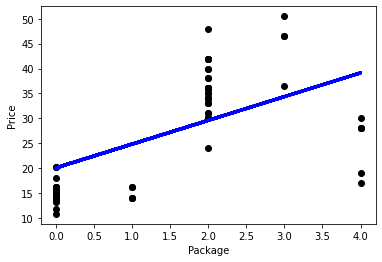

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X_test,y_test,color='black')
plt.plot(X_test,y_pred,color='blue',linewidth=3)
plt.xlabel('Package')
plt.ylabel('Price')
plt.show()

In [10]:
accuracy = model.score(X_train,y_train)
accuracy

0.33487841320379996

In [11]:
import numpy as np
model.predict(np.array([[100]]))

array([[496.4797454]])